### WARNING:
#### This notebook could be very slow without a GPU.
##### Note: I've used Nvidia GeForce 1050 ti 4gb.

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
import tensorflow as tf

assert tf.__version__ >= "2.8.0"

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

In [4]:
from pathlib import Path

IMAGES_PATH = Path()
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if "google.colab" in sys.modules:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if "kaggle_secrets" in sys.modules:
        print("Go to Settings > Accelerator and select GPU.")

2022-09-09 13:57:32.181758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 13:57:33.841682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 13:57:33.842265: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [7]:
try:
    df = pd.read_csv('2000_obs.csv',
                         parse_dates=["transaction_date_time"])
    df = df.drop("credit_card_number", axis=1) # no need for credit_card_number
    df = df.set_index("transaction_date_time")
    print("Dataset has been loaded")
    
except:
    print('Unable to load dataset')

Dataset has been loaded


In [8]:
df

cust_id  transaction_amount transaction_type day_type
transaction_date_time                                                       
96256                     5455                7327                c        w
785459                    7208                6986                a        s
1615429                   9627                6405                a        w
2664541                   9739                1114                d        s
2784743                   6778                 714                c        s
...                        ...                 ...              ...      ...
1659386968                4546                5925                b        w
1659961410                9909                1192                d        s
1660332534                 666                1994                c        s
1661231007                9177                3169                c        w
1661580095                7117                8997                a        w

[2000 rows x 4 columns]

In [9]:
df['transaction_type'].value_counts()

a    528
c    507
d    496
b    469
Name: transaction_type, dtype: int64

#### Assuming 4 different transactions type:

#### a = food,

#### b = pharm,

#### c = fuel 

#### d = others.

In [10]:
df['day_type'].value_counts()

w    1004
s     996
Name: day_type, dtype: int64

#### Assuming two day types:

#### w = weekdays

#### s = weekend

In [11]:
df.shape

(2000, 4)

In [12]:
df.describe()

cust_id  transaction_amount
count  2000.000000         2000.000000
mean   5302.983000         4991.493000
std    2740.037284         2892.753406
min     507.000000          101.000000
25%    2946.000000         2404.750000
50%    5259.000000         4882.500000
75%    7683.250000         7550.750000
max    9995.000000         9992.000000

101 is the lowest spending and 9992 is the highest spending


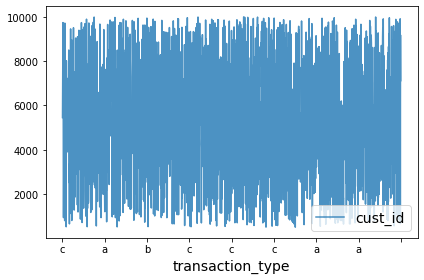

In [13]:
import matplotlib.pyplot as plt

df.plot(kind="line", x="transaction_type", y="cust_id", alpha=0.8)
save_fig("transaction_type against cust_id")

In [14]:
from datetime import datetime
print("lowest transaction_amount date_time:", datetime.fromtimestamp(70741065))
print("highest transaction_amount date_time:", datetime.fromtimestamp(1030973928))

lowest transaction_amount date_time: 1972-03-29 23:17:45
highest transaction_amount date_time: 2002-09-02 19:38:48


let's see the trend from the begining to the last obs we have

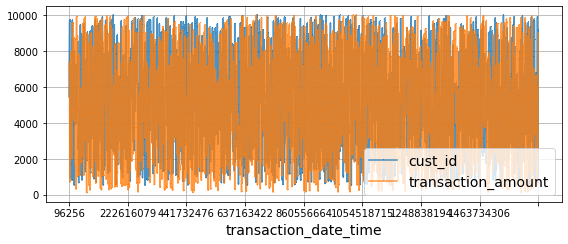

In [15]:
df['96256':'1661580095'].plot(grid=True, marker=',', figsize=(8, 3.5), alpha=0.8)
save_fig('transaction_amount, cust_id with time')
plt.show()

let's check if after 1972-03-29 23:17:45 any low amount transaction occured till the end 2022-08-27 11:01:35


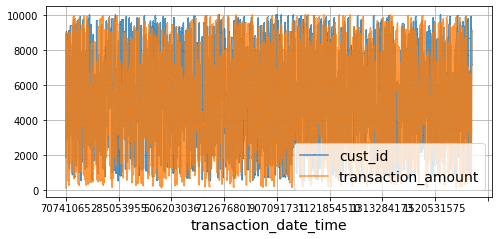

In [16]:
df['70741065':'1661580095'].plot(grid=True, marker=',', figsize=(8, 3.5),
                                  alpha=0.8)
plt.show()

#### There's no such events that shows the transaction amount decreased below 101, after 1972-03-29 23:17:45 till 2022-08-27 11:01:35


In [17]:
#print(datetime.fromtimestamp(1260738756))
#print(datetime.fromtimestamp(1048305858))
print(datetime.fromtimestamp(1661580095))

2022-08-27 11:01:35


#### Hence: The minimum transaction amount is 101, held on 1972-03-29 23:17:45 by cust_id: 9042

#### And the maximum transaction amount is 4998, held on 2002-09-02 19:38:48. by cust_id: 8646

In [18]:
# Checking the daytype on which minimum transactions occured

list(df.loc["70741065"]["day_type"])

['w']

In [19]:
# Checking the daytype on which maximum transactions occured

list(df.loc["1661580095"]["day_type"])

['w']

####  'w' describe the weekday(mon-fri), day_type, therefore we can say that both the lowest and the highest transactions occured on weekend!!

In [20]:
df_mulvar = df[["cust_id", "transaction_amount"]] # using both as inputs
df_mulvar

cust_id  transaction_amount
transaction_date_time                             
96256                     5455                7327
785459                    7208                6986
1615429                   9627                6405
2664541                   9739                1114
2784743                   6778                 714
...                        ...                 ...
1659386968                4546                5925
1659961410                9909                1192
1660332534                 666                1994
1661231007                9177                3169
1661580095                7117                8997

[2000 rows x 2 columns]

In [21]:
df_mulvar["day_type"] = df["day_type"].shift(-1)
df_mulvar["transaction_type"] = df["transaction_type"].shift(-1)
df_mulvar = pd.get_dummies(df_mulvar)
df_mulvar


/tmp/ipykernel_5706/2003346083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mulvar["day_type"] = df["day_type"].shift(-1)


cust_id  transaction_amount  day_type_s  day_type_w  \
transaction_date_time                                                        
96256                     5455                7327           1           0   
785459                    7208                6986           0           1   
1615429                   9627                6405           1           0   
2664541                   9739                1114           1           0   
2784743                   6778                 714           0           1   
...                        ...                 ...         ...         ...   
1659386968                4546                5925           1           0   
1659961410                9909                1192           1           0   
1660332534                 666                1994           0           1   
1661231007                9177                3169           0           1   
1661580095                7117                8997           0           0   

                       transaction_type_a  transaction_type_b  \
transaction_date_time                                           
96256                                   1                   0   
785459                                  1                   0   
1615429                                 0                   0   
2664541                                 0                   0   
2784743                                 0                   0   
...                                   ...                 ...   
1659386968                              0                   0   
1659961410                              0                   0   
1660332534                              0                   0   
1661231007                              1                   0   
1661580095                              0                   0   

                       transaction_type_c  transaction_type_d  
transaction_date_time                                          
96256                                   0                   0  
785459                                  0                   0  
1615429                                 0                   1  
2664541                                 1                   0  
2784743                                 1                   0  
...                                   ...                 ...  
1659386968                              0                   1  
1659961410                              1                   0  
1660332534                              1                   0  
1661231007                              0                   0  
1661580095                              0                   0  

[2000 rows x 8 columns]

In [22]:
1096 + 914 + 151

2161

In [23]:
df_mulvar.shape

(2000, 8)

In [24]:
# 60% of the 2000
0.6 * 2000

1200.0

In [25]:
# 30% of the 2000
0.3 * 2000

600.0

In [26]:
# 10% of the 2000
0.1 * 2000

200.0

In [27]:
# split the dataset in 70%, 30%, 30% to train, valid, and test set repectively

mulvar_train = df_mulvar["96256":"1007875248"]
mulvar_valid = df_mulvar["1010586936":"1507568833"]
mulvar_test = df_mulvar["1507726526":]

print("mulvar_train.shape:", mulvar_train.shape)
print("mulvar_valid.shape:", mulvar_valid.shape)
print("mulvar_test.shape:", mulvar_test.shape)

mulvar_train.shape: (1200, 8)
mulvar_valid.shape: (600, 8)
mulvar_test.shape: (200, 8)


In [28]:
mulvar_train

cust_id  transaction_amount  day_type_s  day_type_w  \
transaction_date_time                                                        
96256                     5455                7327           1           0   
785459                    7208                6986           0           1   
1615429                   9627                6405           1           0   
2664541                   9739                1114           1           0   
2784743                   6778                 714           0           1   
...                        ...                 ...         ...         ...   
1003797362                7468                 269           0           1   
1004837584                7457                3563           0           1   
1005057889                9266                8350           1           0   
1005546746                7529                 155           1           0   
1007875248                9737                1914           1           0   

                       transaction_type_a  transaction_type_b  \
transaction_date_time                                           
96256                                   1                   0   
785459                                  1                   0   
1615429                                 0                   0   
2664541                                 0                   0   
2784743                                 0                   0   
...                                   ...                 ...   
1003797362                              0                   1   
1004837584                              1                   0   
1005057889                              1                   0   
1005546746                              1                   0   
1007875248                              0                   0   

                       transaction_type_c  transaction_type_d  
transaction_date_time                                          
96256                                   0                   0  
785459                                  0                   0  
1615429                                 0                   1  
2664541                                 1                   0  
2784743                                 1                   0  
...                                   ...                 ...  
1003797362                              0                   0  
1004837584                              0                   0  
1005057889                              0                   0  
1005546746                              0                   0  
1007875248                              1                   0  

[1200 rows x 8 columns]

In [29]:
tf.random.set_seed(42)
seq_length = 56

train_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_train.to_numpy(), # use all 8 columns as input
    targets = mulvar_train['cust_id'][seq_length:], # forecast only the 'cust_id series'
    sequence_length = seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_valid.to_numpy(),
    targets = mulvar_valid['cust_id'][seq_length:],
    sequence_length = seq_length,
    batch_size=32
)

2022-09-09 13:57:39.055422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 13:57:39.055959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 13:57:39.056423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 13:57:41.978037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 13:57:41.978279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [30]:
train_mulvar_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [31]:
valid_mulvar_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [32]:
tf.random.set_seed(42)



In [33]:
import joblib

In [34]:
def fit_and_evaluate(train_set, valid_set, learning_rate, epochs):
    try:
        model = joblib.load("bj_model.pkl")
        print("Model has been loaded")
                    
    except:
        try:
            tf.random.set_seed(42)
            
            model = tf.keras.Sequential([
                tf.keras.layers.SimpleRNN(32, input_shape=[None, 8]),
                tf.keras.layers.Dense(1)
            ])
            
            early_stopping_cb = tf.keras.callbacks.EarlyStopping(
                monitor = "val_mae", patience=50,
                restore_best_weights=True)
            
            opt = tf.keras.optimizers.SGD(learning_rate=0.05,
                                      momentum=0.9)
            
            model.compile(loss=tf.keras.losses.Huber(),
                                 optimizer=opt,metrics=["mae"])
    
            history = model.fit(train_mulvar_ds,
                                       validation_data=valid_mulvar_ds,
                                       epochs=epochs,
                                       callbacks=[early_stopping_cb])

        except:
            model = None
            print("Model is None")
            
        try:
            if model != None:
                joblib.dump(model, "bj_model.pkl")
                print("Model has been saved to disk")
                
            else:
                print("Unable to save model to disk")
                
        except:
            print("Error in model training")
            
    return model

In [35]:
model = fit_and_evaluate(train_mulvar_ds, valid_mulvar_ds,
                 learning_rate= 0.05, epochs=10)

Model has been loaded


In [36]:
valid_loss, valid_mae = model.evaluate(valid_mulvar_ds)
print(valid_loss)
print(valid_mae)
           


17/17 [==============================] - 7s 18ms/step - loss: 2555.6406 - mae: 2556.1404
2555.640625
2556.140380859375


In [37]:
test_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_test.to_numpy(),
    targets = mulvar_test['cust_id'][seq_length:],
    sequence_length=seq_length,
)

In [38]:
test_mulvar_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 8), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [39]:
forecast = model.predict(test_mulvar_ds)

2/2 [==============================] - 0s 15ms/step


In [40]:
forecast

array([[3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
       [3803.5586],
